### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of the assignment, you will have to accomplish the below tasks.

**Author:** Ayoub Berdeddouch

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import sklearn as skl 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

import shap
shap.initjs()


## Load the data
Display the first 5 rows of the data after loading.

In [2]:
data=pd.read_csv('Training_set_breastcancer.csv')
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


## Perform Basic Exploratory Data Analysis (EDA)

In [3]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,3.076209e+07,14.070997,19.331985,91.589121,651.631910,0.096289,0.103197,0.087454,0.047821,0.181122,...,16.202219,25.647286,106.882337,876.737186,0.132595,0.249983,0.269575,0.112627,0.288792,0.083445
std,1.277890e+08,3.577839,4.221225,24.706388,358.679197,0.012988,0.050805,0.079728,0.038329,0.026829,...,4.898797,6.171891,34.370030,581.202196,0.022235,0.150280,0.210256,0.065617,0.058800,0.016469
min,8.913000e+03,6.981000,10.720000,43.790000,143.500000,0.052630,0.026500,0.000000,0.000000,0.106000,...,7.930000,12.870000,50.410000,185.200000,0.084840,0.043270,0.000000,0.000000,0.156500,0.055040
25%,8.674750e+05,11.645000,16.172500,74.690000,415.375000,0.086635,0.066013,0.028010,0.019787,0.161650,...,12.980000,20.807500,83.730000,510.325000,0.116875,0.148600,0.116500,0.063532,0.250050,0.071240
50%,9.055295e+05,13.205000,18.895000,85.660000,538.300000,0.096515,0.095090,0.059935,0.033420,0.179300,...,14.800000,25.225000,96.085000,671.500000,0.131600,0.211750,0.223050,0.100465,0.280650,0.080210
75%,8.812818e+06,15.745000,21.660000,103.700000,780.325000,0.105300,0.129550,0.126675,0.068282,0.195675,...,18.540000,29.622500,125.075000,1048.500000,0.146375,0.330650,0.377400,0.157250,0.316875,0.091990
max,9.113205e+08,28.110000,33.810000,188.500000,2501.000000,0.132600,0.345400,0.426400,0.191300,0.290600,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.577400,0.148600


In [4]:
data.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

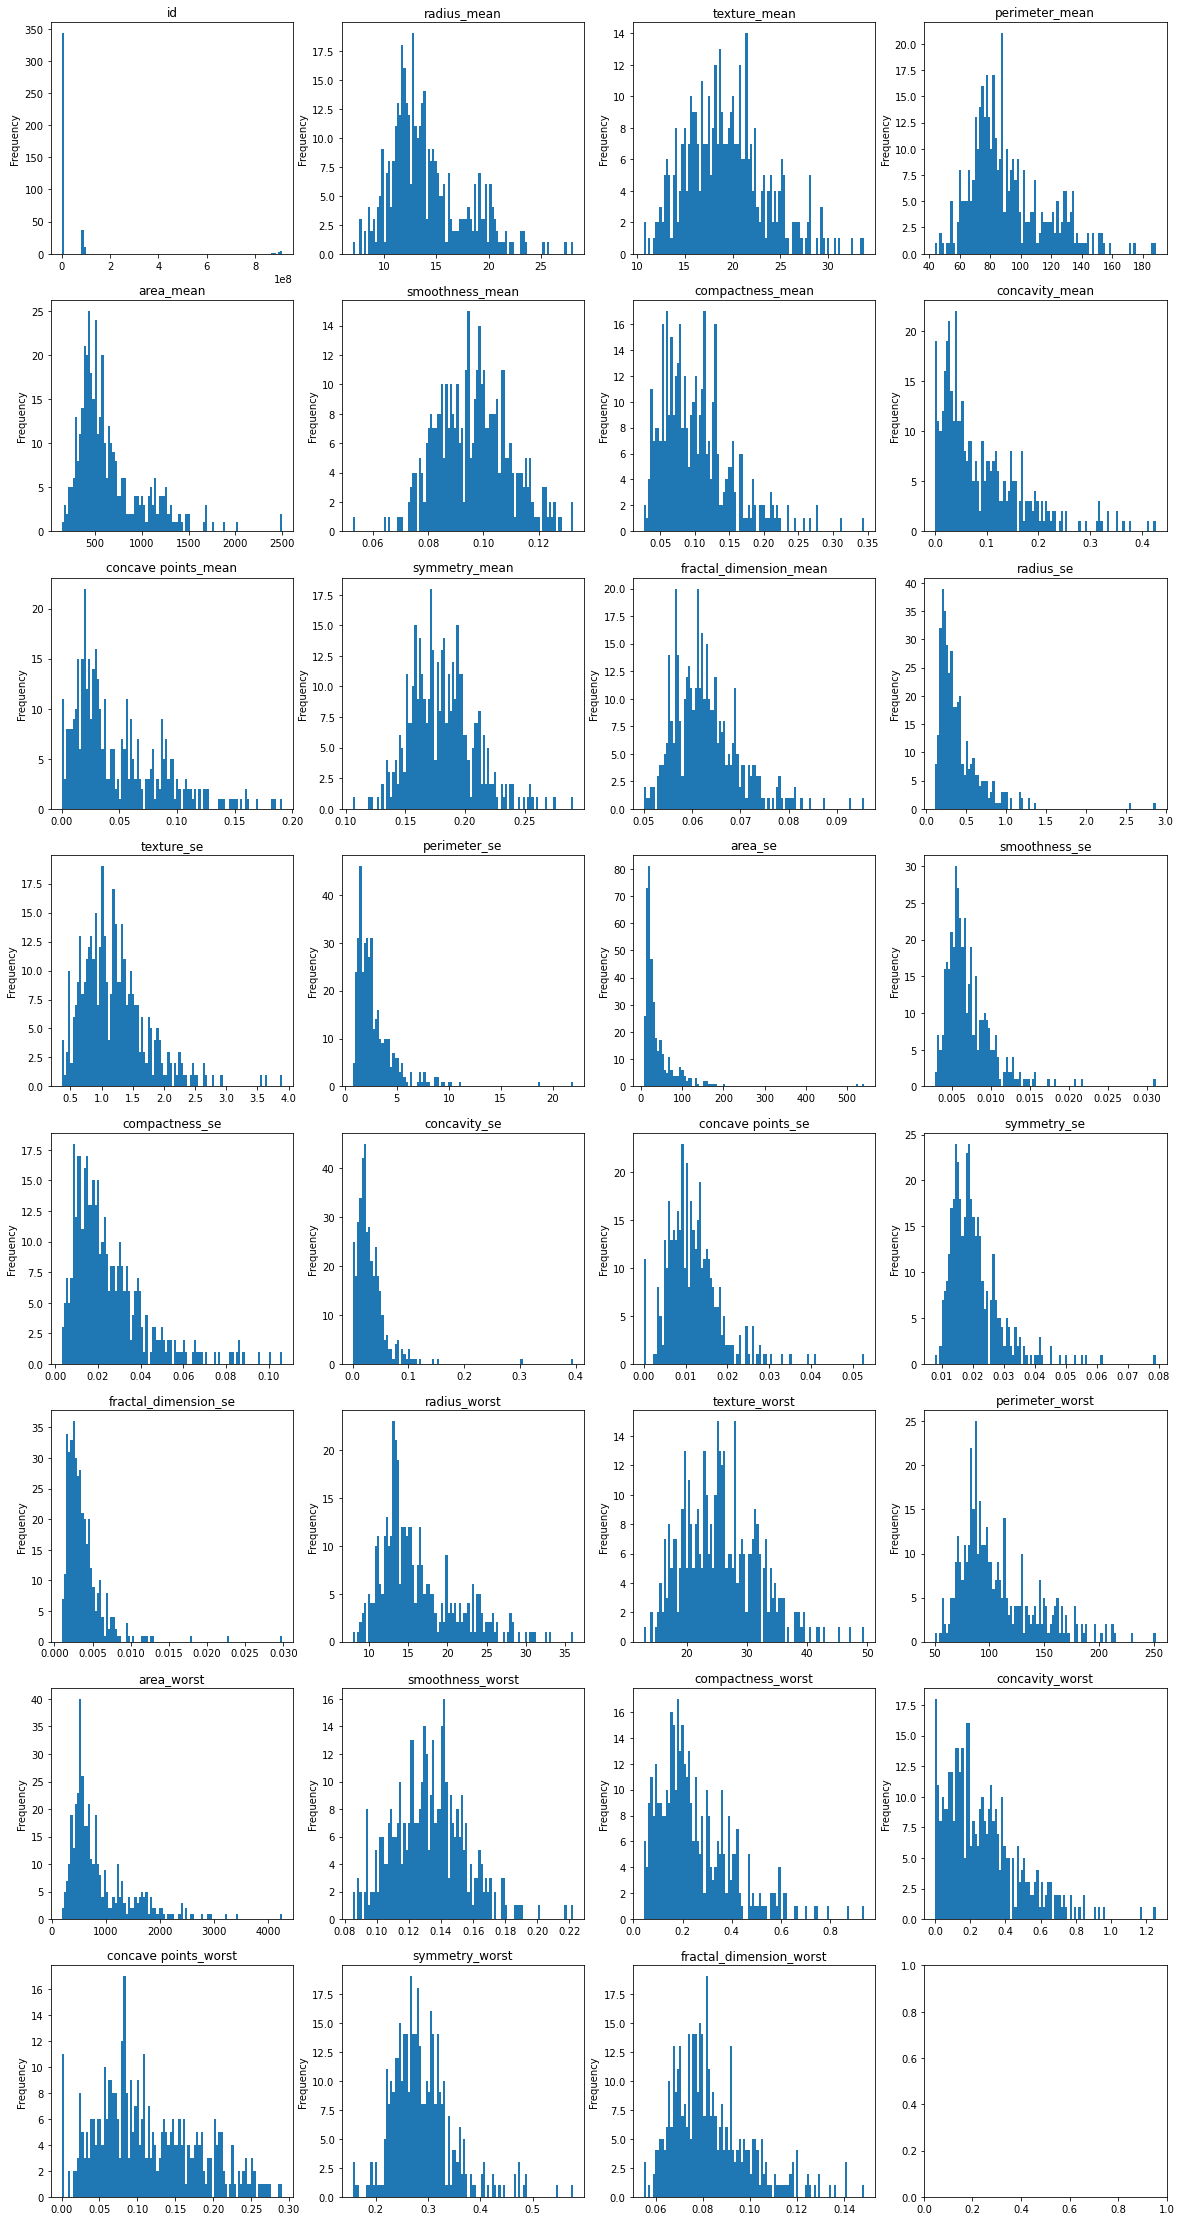

In [5]:
f,ax=plt.subplots(8,4,figsize=(20,40))
x,y=0,0
for columnName in data.columns[:len(data.columns)-1]:
    data[columnName].plot.hist(ax=ax[x,y],title=columnName,bins=100)
    y+=1
    if(y==4):
        y=0
        x+=1

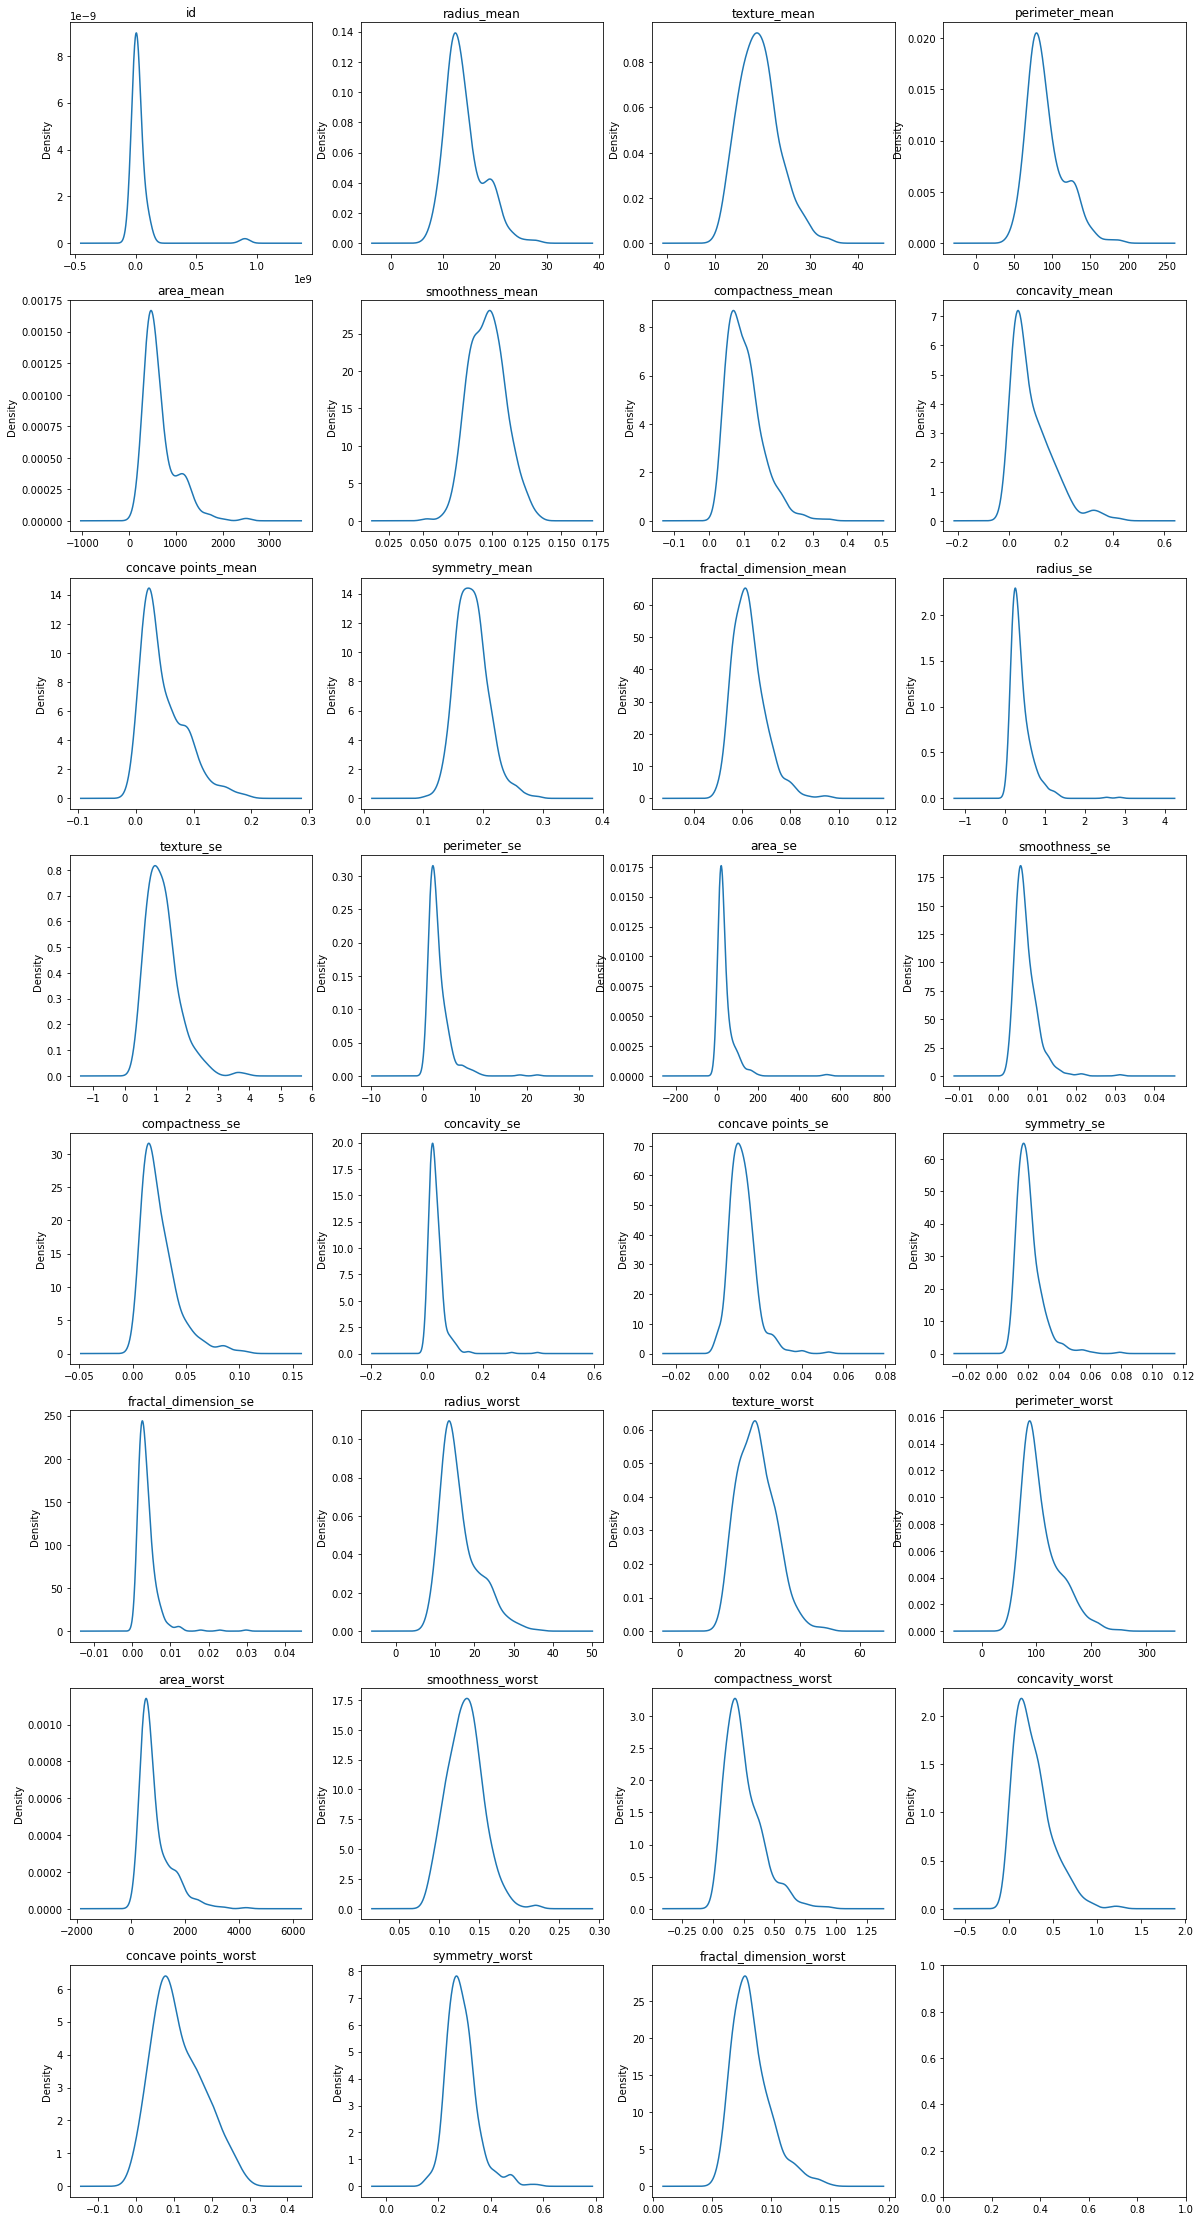

In [6]:
f,ax=plt.subplots(8,4,figsize=(20,40))
x,y=0,0
for columnName in data.columns[:len(data.columns)-1]:
    data[columnName].plot.kde(ax=ax[x,y],title=columnName)
    y+=1
    if(y==4):
        y=0
        x+=1

<AxesSubplot:>

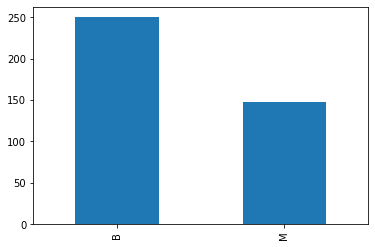

In [7]:
data['diagnosis'].value_counts().plot.bar()

In [8]:
data.iloc[:,1:len(data.columns)-1]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.160,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,...,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
1,11.750,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757
2,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147
3,12.000,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194
4,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,16.160,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.1395,0.3055,0.29920,0.13120,0.3480,0.07619
394,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187
395,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
396,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.1460,0.1310,0.00000,0.00000,0.2445,0.08865


In [9]:
data.iloc[:,len(data.columns)-1:len(data.columns)]

,diagnosis
0,B
1,B
2,B
3,B
4,M
...,...
393,M
394,M
395,M
396,B


## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

<AxesSubplot:>

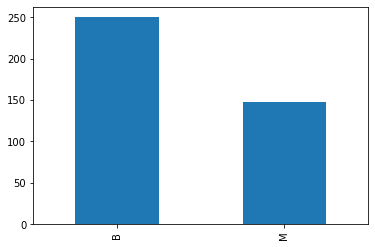

In [10]:
# data.loc[data['diagnosis']=='M','diagnosis']=1
# data.loc[data['diagnosis']=='B','diagnosis']=0
data['diagnosis'].value_counts().plot.bar()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,1:len(data.columns)-1], 
    data['diagnosis'], test_size=0.2, random_state=0)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(318, 30) (80, 30) (318,) (80,)


# Task 2

## Use Random Forest Machine Learning Model for prediction

In [12]:
model = RandomForestClassifier(n_jobs=-1,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

['M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M'
 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B']


## Evaluate the model using Accuracy Score

In [13]:
accuracy_score = metrics.accuracy_score(y_test,y_pred)
accuracy_score

0.9625

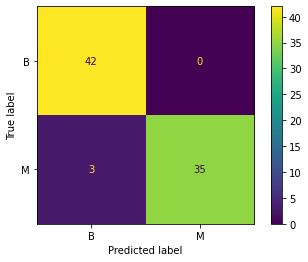

In [14]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                    display_labels=model.classes_)
disp.plot()

# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [15]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

print('Expected Value:', explainer.expected_value)

pd.DataFrame(shap_values[1]).head()

Expected Value: [0.65572327 0.34427673]


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.001680,0.027070,0.008717,-0.002831,0.000447,-0.002534,0.062062,0.044722,-0.004713,-0.000763,...,-0.054472,0.019988,0.127153,-0.000693,0.010324,0.019098,0.047572,0.071587,0.007357,0.026810
1,-0.008789,-0.006351,-0.031866,-0.020514,0.000413,-0.000985,-0.016645,-0.019461,-0.000693,-0.000358,...,-0.057630,-0.000129,-0.066192,-0.037048,0.001644,-0.000150,-0.014912,-0.027838,-0.001509,-0.003977
2,-0.009101,0.010193,-0.050460,-0.026388,-0.000205,-0.008281,-0.023947,-0.022954,0.002303,0.001174,...,0.128194,0.006657,0.162554,0.110163,0.006421,-0.001290,-0.001663,-0.026589,0.000583,-0.002795
3,-0.009573,-0.015831,-0.025536,-0.022865,-0.001394,-0.000593,-0.016390,-0.020626,0.001888,0.001285,...,-0.055847,-0.012024,-0.060823,-0.033289,-0.003625,-0.002231,-0.010010,-0.027016,-0.002285,-0.003475
4,-0.008650,-0.005688,-0.027807,-0.020006,-0.001952,-0.001521,-0.016365,-0.020010,-0.000615,0.001191,...,-0.054303,-0.009055,-0.063813,-0.029510,-0.005397,-0.001912,-0.012743,-0.029114,-0.000824,-0.003998


In [16]:
npa = np.asarray(shap_values, dtype=np.float32)

In [17]:
type(shap_values)

list

## Write your inferences from the generated plot.

in here we can see the feature importance for every row of data.

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [18]:
npa[1][0][20]

-0.05447232

In [19]:
X_test.iloc[0,:]

radius_mean                 14.250000
texture_mean                21.720000
perimeter_mean              93.630000
area_mean                  633.000000
smoothness_mean              0.098230
compactness_mean             0.109800
concavity_mean               0.131900
concave points_mean          0.055980
symmetry_mean                0.188500
fractal_dimension_mean       0.061250
radius_se                    0.286000
texture_se                   1.019000
perimeter_se                 2.657000
area_se                     24.910000
smoothness_se                0.005878
compactness_se               0.029950
concavity_se                 0.048150
concave points_se            0.011610
symmetry_se                  0.020280
fractal_dimension_se         0.004022
radius_worst                15.890000
texture_worst               30.360000
perimeter_worst            116.200000
area_worst                 799.600000
smoothness_worst             0.144600
compactness_worst            0.423800
concavity_wo

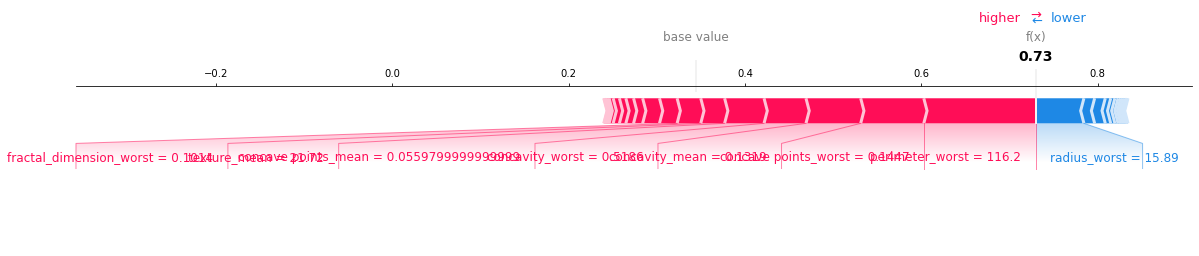

In [20]:
shap.force_plot(explainer.expected_value[1], npa[1][0], X_test.iloc[0,:],matplotlib=True)

## Write your inferences from the generated plot.

this person considered malignant with highest factor fractal_dimension. red-colored factor are the parameter that make the model to predict this person as malignant. and radius_worst is the parameter that say otherwise.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [21]:
shap.force_plot(explainer.expected_value[1], npa[1], X_test)

## Write your inferences from the generated plot.

from this plot we can see how every data show its importance. for example, perimeter_worst show higher effect to make model show as malignant when the value growing.

# Task 6

## Plot a SHAP summary plot using all the features in the data

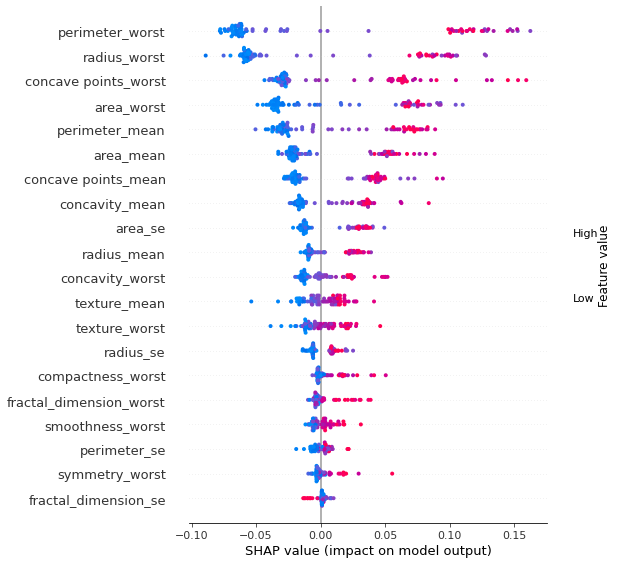

In [22]:
shap.summary_plot(npa[1], X_test)

## Write your inferences from the generated plot.

perimeter_worst, radius_worst and concave points_worst are the top 3 parameter that give higher impact. permiter_se, symmetry_worst and fractal_dimension_se are the bottom 3 parameter that have lowest impact on the model.

# Task 7

## Plot a SHAP dependecne plot using all features in the data

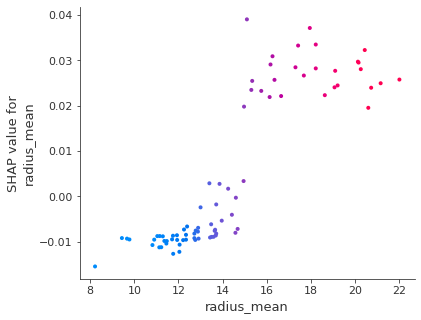

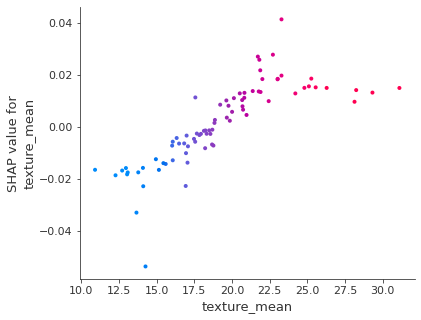

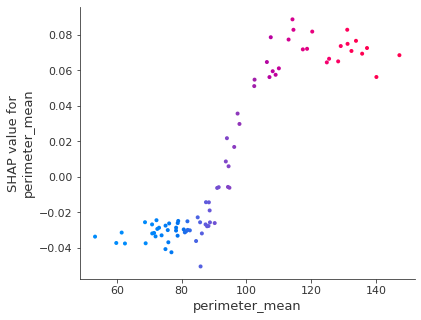

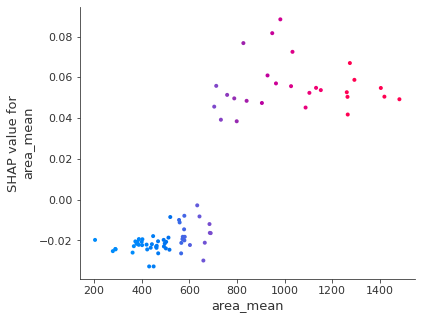

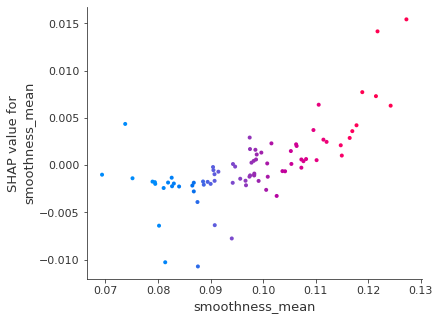

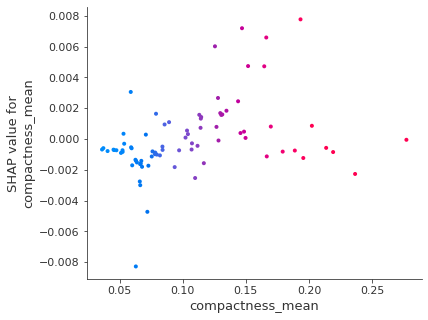

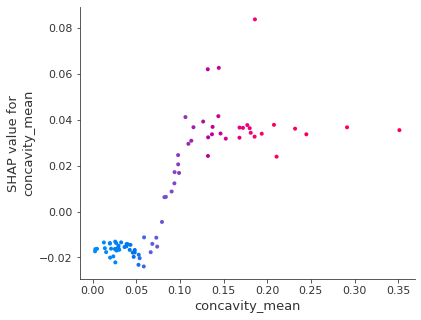

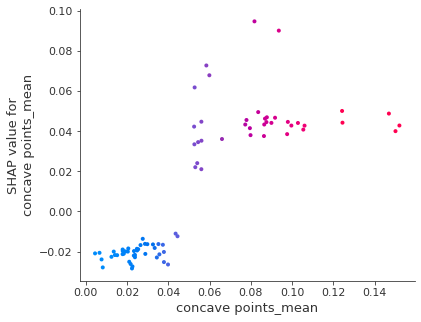

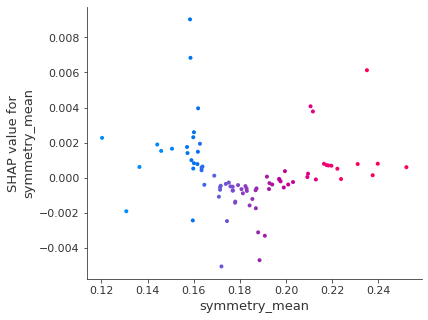

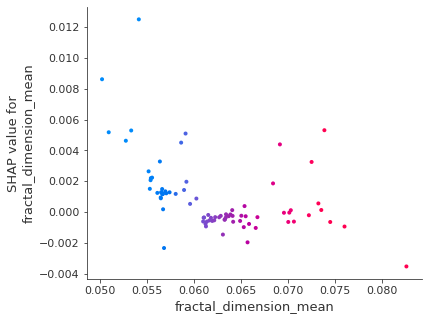

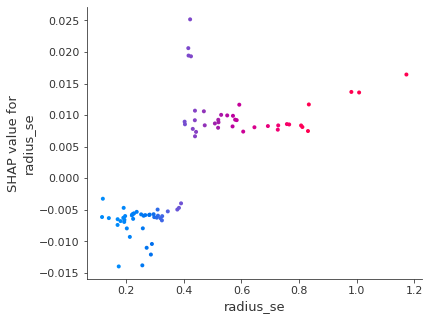

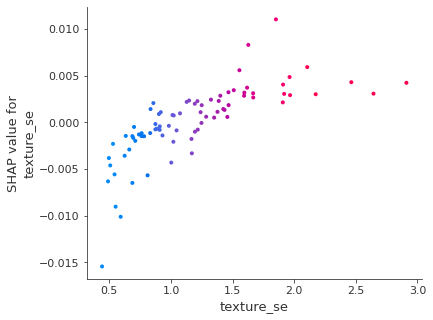

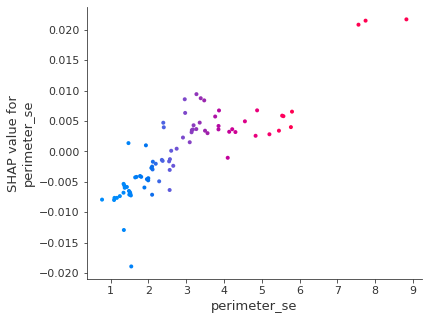

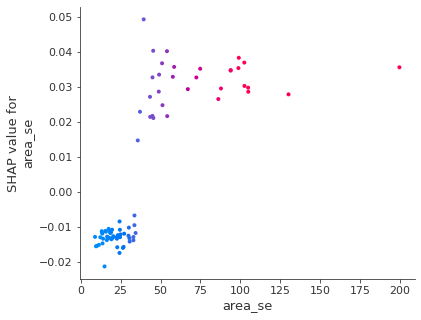

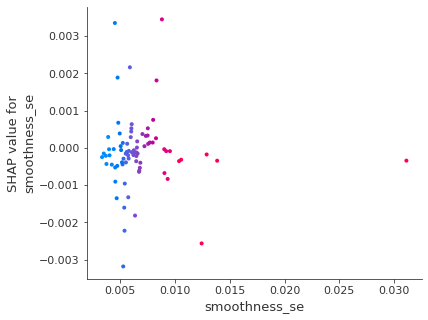

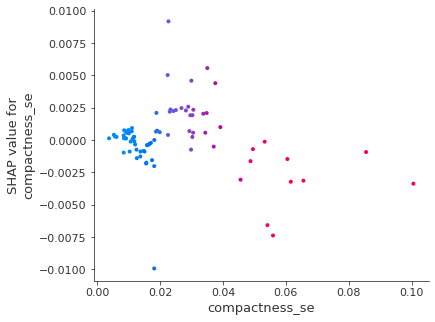

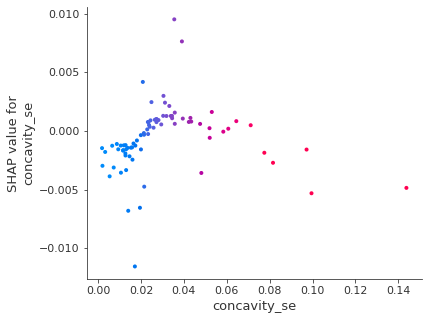

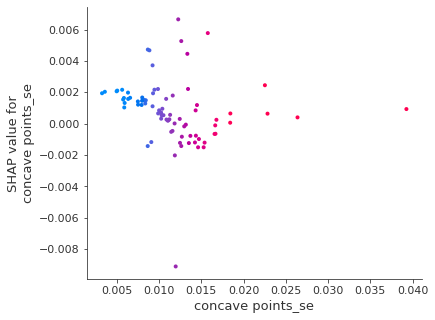

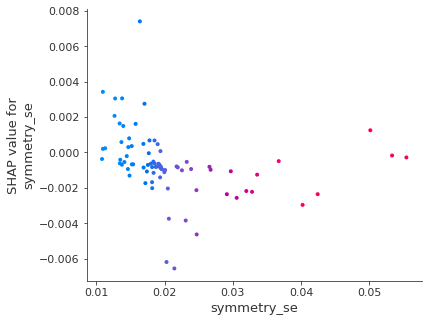

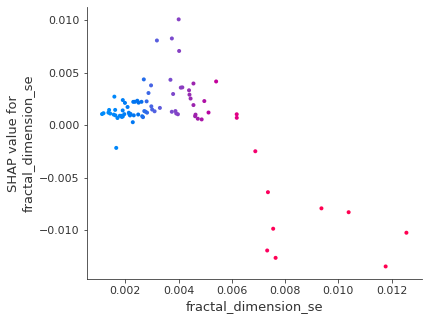

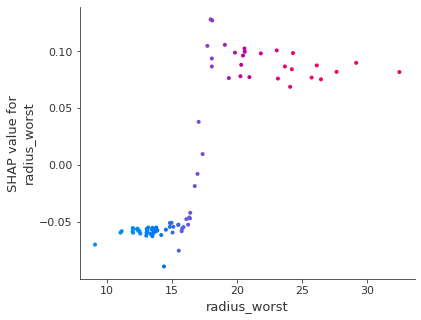

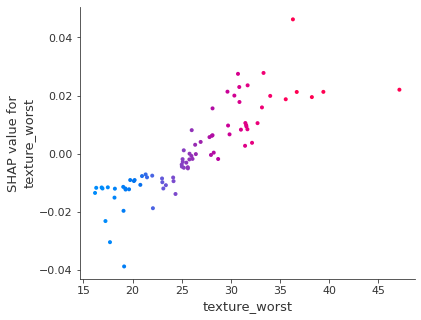

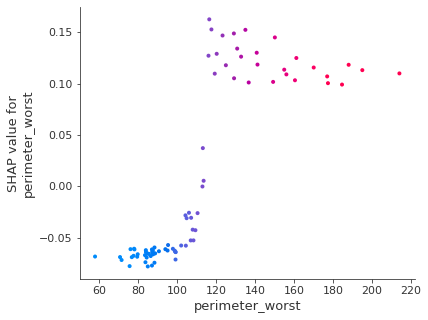

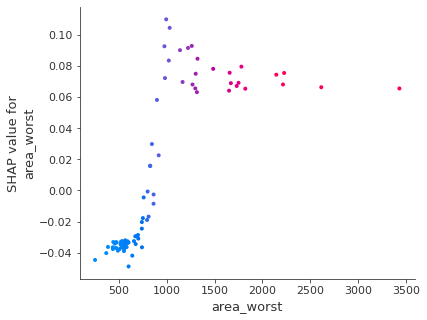

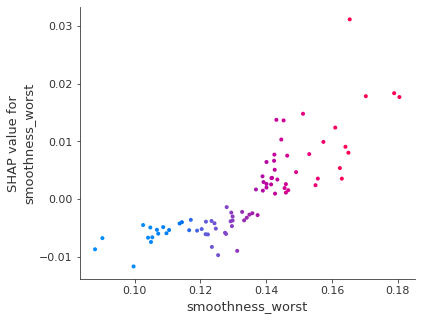

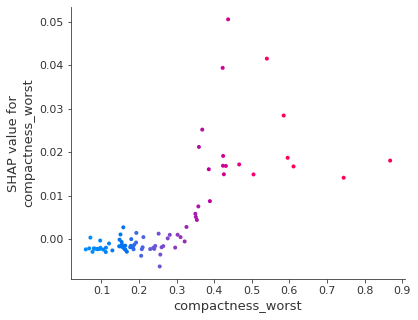

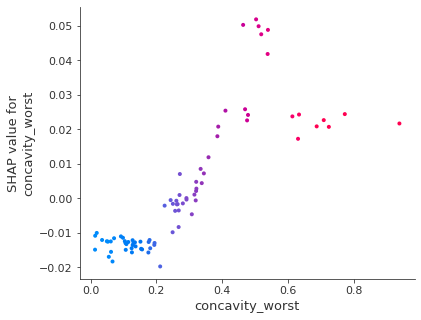

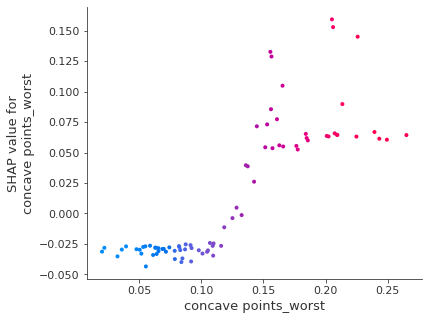

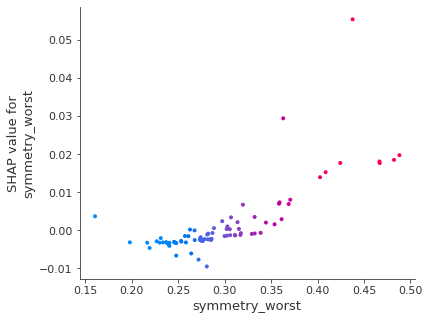

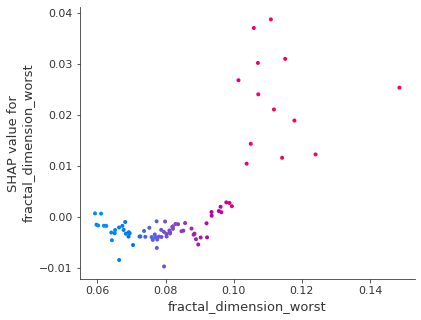

In [23]:

for columnName in data.columns[1:len(data.columns)-1]:
    shap.dependence_plot(ind=columnName, interaction_index=columnName,
        shap_values=npa[1],
        features=X_test,
        display_features=X_test
        )
        

## Write your inferences from the generated plot.

This feature have little to no effect in the prediction
1. compactness_mean
2. symmetry_mean
3. fractal_dimension_mean
4. smoothness_se
5. compactness_se
6. concavity_seconcave points_se
7. symmetry_se

fractal_dimension_se feature are likely to make the model to predict benign. as for the rest feature are likely to make the model to predict malignant.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.